In [1]:
import pandas as pd
chlo = "chloride.csv"
sofa = "sofa_pan.csv"
mort = "icu_mort.csv"

sofa = pd.read_csv(sofa)
chl = pd.read_csv(chlo)
mor = pd.read_csv(mort)

In [3]:
chldf = chl[['icustay_id','icu_day','chloride_max']]
chldf = chldf[chldf['icu_day']<=7]
chl_max = chldf.sort_values('chloride_max', ascending=False).drop_duplicates(['icustay_id'])
chl_max = chl_max.dropna()
chl_max.head()

,icustay_id,icu_day,chloride_max
118937,222836,1,198.0
188905,254370,1,155.0
170102,223444,1,154.0
88858,234838,1,151.0
161321,219569,1,149.0


In [4]:
chl3 = chl.loc[chl['icu_day'] <= 3]
chl3 = chl3.dropna(subset = ['chloride_input_meq'])
chl3.reset_index
chl3.head()

,subject_id,hadm_id,icustay_id,icu_day,chloride_input_meq,chloride_max
0,3,145834,211552,1,1861.475,114.0
1,3,145834,211552,2,241.780,112.0
2,3,145834,211552,3,124.740,111.0
6,4,185777,294638,1,150.150,108.0
8,6,107064,228232,1,335.720,101.0


In [5]:
chl3 = chl3[['icustay_id','chloride_input_meq']]

In [6]:
ChlIn = chl3.groupby(['icustay_id']).mean()
ChlIn.reset_index(level=0, inplace=True)
ChlIn = ChlIn.dropna()
ChlIn.head()

,icustay_id,chloride_input_meq
0,200001,23.100000
1,200003,271.526667
2,200007,221.760000
3,200009,281.000000
4,200010,464.727083


In [7]:
ChlIn.to_csv('chloride_input_meq.csv', encoding='utf-8', index=False)

In [8]:
df = pd.merge(ChlIn, mor, on = 'icustay_id')
df = df[['icustay_id','chloride_input_meq','in_icu_mort']]
df = df.dropna()
df.head()

,icustay_id,chloride_input_meq,in_icu_mort
0,200001,23.100000,0
1,200003,271.526667,0
2,200007,221.760000,0
3,200009,281.000000,0
4,200010,464.727083,0


In [9]:
sofadf = sofa[['icustay_id','day','sofa']]
sofadf = sofadf[sofadf['day']==1]
sofadf.head()

,icustay_id,day,sofa
0,211552,1.0,7
6,294638,1.0,2
8,228232,1.0,4
12,220597,1.0,5
18,229441,1.0,2


In [10]:
df1 = pd.merge(df, sofadf, on = 'icustay_id')
df1 = df1[['icustay_id','chloride_input_meq','sofa','in_icu_mort']]
df1.head()

,icustay_id,chloride_input_meq,sofa,in_icu_mort
0,200001,23.100000,6,0
1,200003,271.526667,6,0
2,200007,221.760000,1,0
3,200009,281.000000,3,0
4,200010,464.727083,0,0


In [11]:
data = pd.merge(chl_max, df, on='icustay_id')
data.head()

,icustay_id,icu_day,chloride_max,chloride_input_meq,in_icu_mort
0,222836,1,198.0,319.466667,0
1,254370,1,155.0,597.795243,0
2,223444,1,154.0,379.663278,0
3,234838,1,151.0,311.556667,0
4,219569,1,149.0,929.033513,0


In [12]:
data.describe()

,icustay_id,icu_day,chloride_max,chloride_input_meq,in_icu_mort
count,44428.000000,44428.000000,44428.000000,44428.000000,44428.000000
mean,250147.596898,1.751508,108.205861,212.995110,0.077339
std,28899.448373,1.356673,5.999792,178.247572,0.267131
min,200001.000000,1.000000,74.000000,0.035933,0.000000
25%,225101.750000,1.000000,105.000000,91.373333,0.000000
50%,250191.500000,1.000000,108.000000,175.927806,0.000000
75%,275201.250000,2.000000,112.000000,287.128704,0.000000
max,299999.000000,7.000000,198.000000,6742.800773,1.000000


In [13]:
data['chloride_input_meq'].corr(data['chloride_max'])

0.29369111625675354

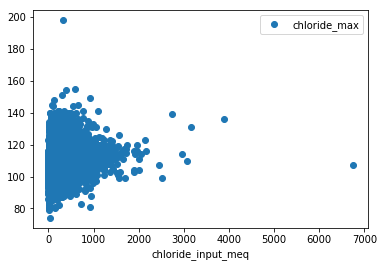

In [15]:
data.plot(x='chloride_input_meq', y='chloride_max',style='o')

In [16]:
X = data[['chloride_input_meq','chloride_max']]

In [17]:
y = data.iloc[:, -1]

mort = data.loc[y == 1]

non_mor= data.loc[y == 0]

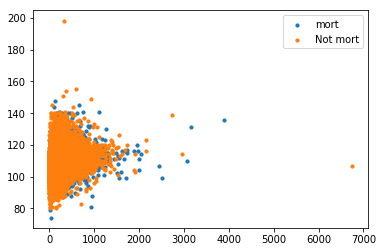

In [20]:
# imports
import numpy as np
import matplotlib.pyplot as plt
# plots
plt.scatter(mort.iloc[:,3], mort.iloc[:,2], s=10, label='mort')
plt.scatter(non_mor.iloc[:,3], non_mor.iloc[:,2], s=10, label='Not mort')
plt.legend()
plt.show()